In [12]:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

from sklearn.externals import joblib

finalMergedDF = joblib.load('finalMergedDF_noOutputs_fatigue.pkl') 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from pandas import concat

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

del finalMergedDF['time']

cols = list(finalMergedDF)
cols.insert(0, cols.pop(cols.index('fatigue')))
finalMergedDF = finalMergedDF.loc[:,cols]

values = finalMergedDF.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# scaler_later = scaler.fit(values)

# joblib.dump(scaler_later, 'scaler.pkl') 

reframed = series_to_supervised(scaled, 1,1)
reframed.drop(reframed.columns[[27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]], axis=1, inplace=True)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var1(t)
1,0.6,0.984299,0.002446,0.486229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043334,0.000000,0.362319,0.166667,0.092233,0.057971,0.00,0.5170,1.000000,0.5
2,0.5,0.987010,0.057319,0.455463,0.059603,0.111111,0.000000,0.896098,0.000000,0.000000,...,0.094598,0.093417,0.347826,0.166667,0.300971,0.101449,0.00,0.2013,0.652174,0.2
3,0.2,0.984789,0.115492,0.529863,0.205298,0.222222,0.633427,0.000000,0.722975,0.000000,...,0.109754,0.000833,0.347826,0.166667,0.000000,0.000000,0.00,0.3340,0.826087,0.2
4,0.2,0.887669,0.223757,0.327139,0.039735,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.236191,0.000833,0.347826,0.166667,0.019417,0.000000,0.00,0.3425,0.826087,0.3
5,0.3,0.993285,0.008675,0.486229,0.205298,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.236191,0.000833,0.318841,0.166667,0.000000,0.000000,0.00,0.3350,0.869565,0.3
6,0.3,0.968664,0.001493,0.486948,0.152318,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193927,0.000000,0.318841,0.166667,0.077670,0.057971,0.00,0.2286,0.913043,0.4
7,0.4,0.988334,0.010848,0.488600,0.006623,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193927,0.000000,0.318841,0.166667,0.000000,0.000000,0.00,0.4277,0.956522,0.4
8,0.4,0.984607,0.000003,0.486229,0.039735,0.000000,0.626062,0.000000,0.000000,0.000000,...,0.133716,0.001583,0.333333,0.166667,0.048544,0.043478,0.00,0.2083,0.478261,0.4
9,0.4,0.984127,0.164565,0.428487,0.033113,0.222222,0.000000,0.868114,0.698254,0.000000,...,0.052457,0.000000,0.333333,0.166667,0.048544,0.028986,0.00,0.6928,0.695652,0.4
10,0.4,0.996324,0.048656,0.475731,0.185430,0.000000,0.000000,0.740773,0.677671,0.000000,...,0.078873,0.222500,0.318841,0.166667,0.067961,0.014493,0.00,0.6499,0.739130,0.9


In [45]:
values = reframed.values
n_train_hours = 550
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(550, 1, 26) (550,) (181, 1, 26) (181,)


Train on 550 samples, validate on 181 samples
Epoch 1/50
 - 3s - loss: 0.4754 - val_loss: 0.3598
Epoch 2/50
 - 0s - loss: 0.2213 - val_loss: 0.1313
Epoch 3/50
 - 0s - loss: 0.1806 - val_loss: 0.1660
Epoch 4/50
 - 0s - loss: 0.2070 - val_loss: 0.1410
Epoch 5/50
 - 0s - loss: 0.1877 - val_loss: 0.1204
Epoch 6/50
 - 0s - loss: 0.1767 - val_loss: 0.1267
Epoch 7/50
 - 0s - loss: 0.1691 - val_loss: 0.1174
Epoch 8/50
 - 0s - loss: 0.1607 - val_loss: 0.1110
Epoch 9/50
 - 0s - loss: 0.1613 - val_loss: 0.1093
Epoch 10/50
 - 0s - loss: 0.1603 - val_loss: 0.1068
Epoch 11/50
 - 0s - loss: 0.1567 - val_loss: 0.1063
Epoch 12/50
 - 0s - loss: 0.1525 - val_loss: 0.1044
Epoch 13/50
 - 0s - loss: 0.1505 - val_loss: 0.1036
Epoch 14/50
 - 0s - loss: 0.1496 - val_loss: 0.1031
Epoch 15/50
 - 0s - loss: 0.1471 - val_loss: 0.1028
Epoch 16/50
 - 0s - loss: 0.1445 - val_loss: 0.1022
Epoch 17/50
 - 0s - loss: 0.1430 - val_loss: 0.1019
Epoch 18/50
 - 0s - loss: 0.1409 - val_loss: 0.1016
Epoch 19/50
 - 0s - loss: 0

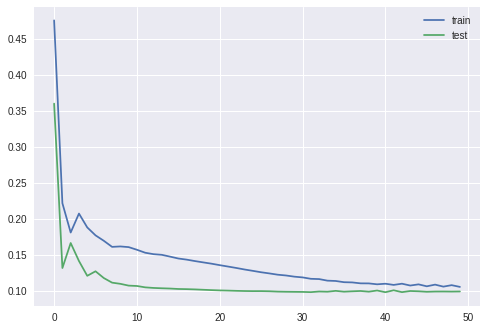

In [46]:
import matplotlib.pyplot as plt 
model = Sequential()
model.add(LSTM(250, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# make a prediction
yhat = DataFrame(model.predict(test_X))
test_X = DataFrame(test_X.reshape((test_X.shape[0], test_X.shape[2])))
# invert scaling for forecast
inv_yhat = concat((yhat, test_X.iloc[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = DataFrame(test_y.reshape((len(test_y), 1)))
inv_y = concat((test_y, test_X.iloc[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('r-squared: %f'%(r2_score(inv_y, inv_yhat)))

Test RMSE: 0.637
r-squared: 0.211337


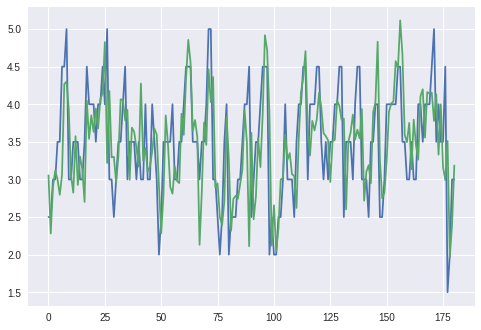

In [21]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [0]:
model.save('LSTM_fatigue_predictor_no_reporter.h5')  


In [0]:
from google.colab import files
files.download('LSTM_fatigue_predictor_no_reporter.h5')